# Plot Gaia DR2 sky chart  

#### Can be used on small non-polar sky patches. An improved version should use cartopy for better projections and added flexibility

In [18]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astroquery.vizier import Vizier
from astropy import coordinates
import astropy.units as u
from astropy.wcs import WCS

In [86]:
# SKY PARAMETERS

# Position
# format: "05h35m17.3s -05d23m28s"

coord_str="06h09m0.3s +24d21m00s"

# limiting magnitude
mag_lim = 15

# field size (degrees) 
fov = 0.8

In [87]:
# PLOT PARAMETERS

font_s=15

In [88]:
c = coordinates.SkyCoord(coord_str, frame='icrs')

In [89]:
# Gaia DR2 query
v = Vizier(columns=['_RAJ2000', '_DEJ2000', 'pmRA', 'pmDE','e_RAJ2000', 'e_DEJ2000', 'e_pmRA', 'e_pmDE', 'Gmag',
                    'astrometric_chi2_al', 'astrometric_n_good_obs_al', 'phot_g_mean_mag', 'astrometric_gof_al', 
                    'astrometric_params_solved','bp_rp'],
           column_filters={"Gmag":"<"+str(mag_lim)},timeout=300)
v.ROW_LIMIT = 10000

In [90]:
qres = v.query_region(c, width=fov*u.deg,catalog=["I/345/gaia2"])

In [91]:
qtab=qres[0]

In [92]:
qtab['ra']=qtab['_RAJ2000']/15.

In [93]:
qtab['ra', '_DEJ2000','Gmag'].write('./extracted.csv', format='ascii.csv',overwrite="True")

In [94]:
# Compute sky area
area=[(c.ra.value-fov/2), (c.ra.value+fov/2), c.dec.value-fov/2, c.dec.value+fov/2]

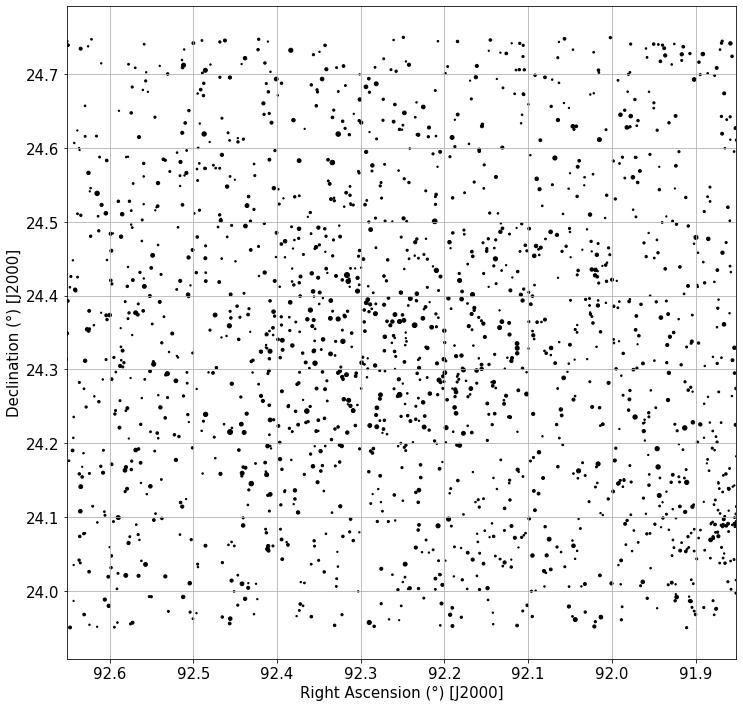

In [95]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.scatter(qtab['_RAJ2000'],qtab['_DEJ2000'],s=(0.5+mag_lim-qtab['Gmag'])*3.,c='black')
ax.grid()
ax.set_xlim(area[1],area[0])
ax.set_xlabel('Right Ascension (°) [J2000]',fontsize=font_s)
ax.set_ylabel('Declination (°) [J2000]',fontsize=font_s)
ax.tick_params(axis='both', labelsize=font_s)



In [96]:
fig.savefig('starchart.svg')